<a href="https://colab.research.google.com/github/tinotenda-alfaneti/stock-portifolio-simulation/blob/main/portifolio_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student ID : 69352024
# Name : Tinotenda Rodney Alfaneti
# Source URL : [Stock Portifolio Simulation](https://quantpy.com.au/python-for-finance/simulated-stock-portolio/)

[*********************100%***********************]  6 of 6 completed


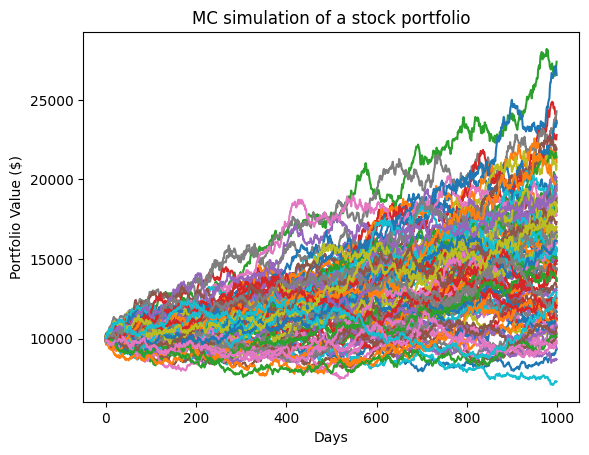

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# from pandas_datareader import data as pdr
import yfinance as yf

# import data
def get_data(stocks, start, end):
    # stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = yf.download(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix
stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
meanReturns, covMatrix = get_data(stocks, startDate, endDate)
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

# Monte Carlo Method
mc_sims = 100 # number of simulations
T = 1000 #timeframe in days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

This tutorial demonstrates the implementation of the Monte Carlo method to simulate a stock portfolio over time. The key principles shown include the assumption that daily returns are distributed by a multivariate normal distribution and the use of Cholesky decomposition to determine a lower triangular matrix for the covariance matrix. The weights of the portfolio are assigned at random and normalized to ensure the summation equals 1. As the number of simulations increases, the computation required to complete the method also increases, aiming for a convergence to the 'exact' solution within reason. The output is a plot showing the MC simulation of the stock portfolio over time.

[*********************100%***********************]  6 of 6 completed


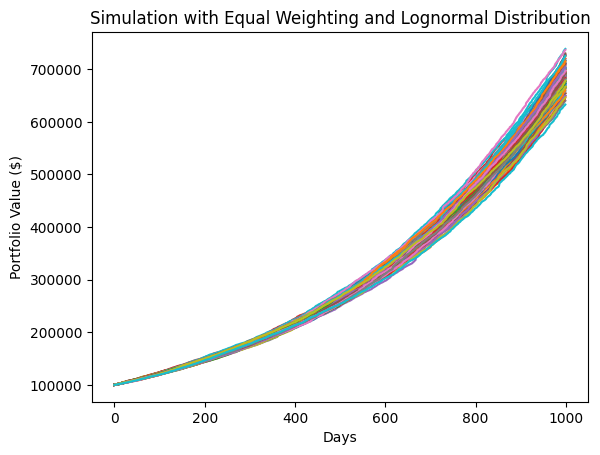

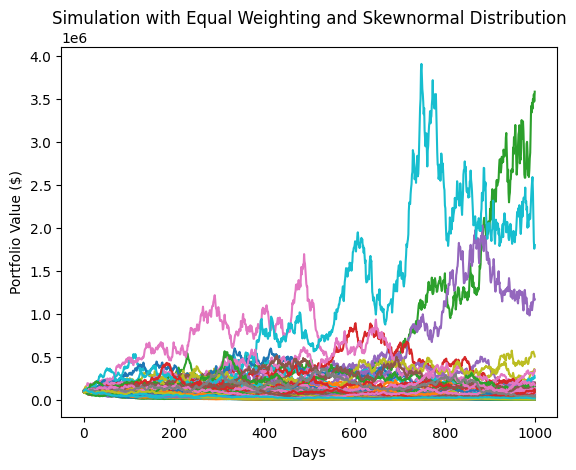

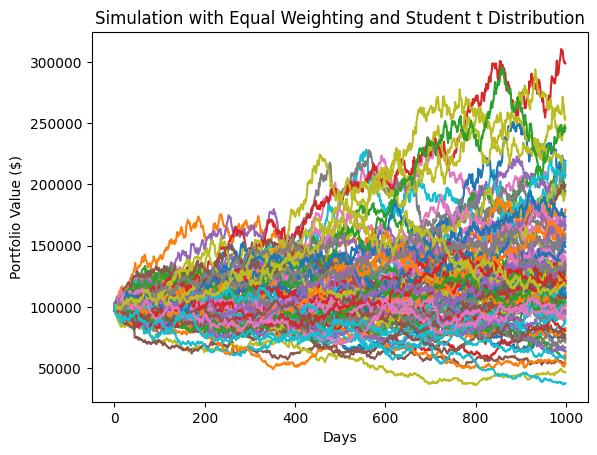

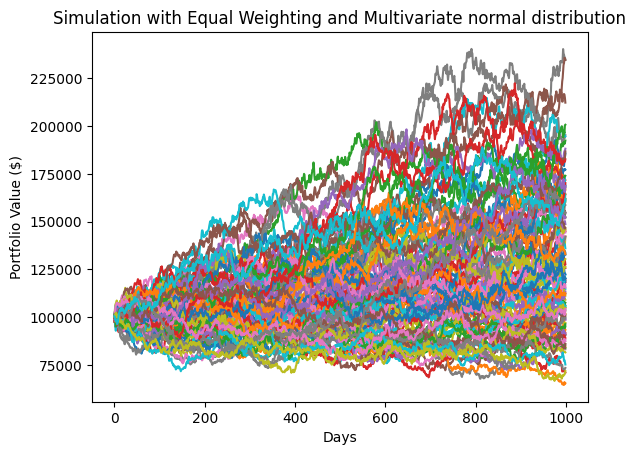

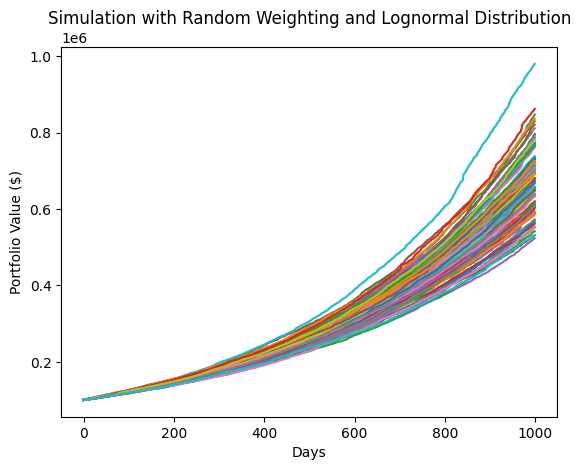

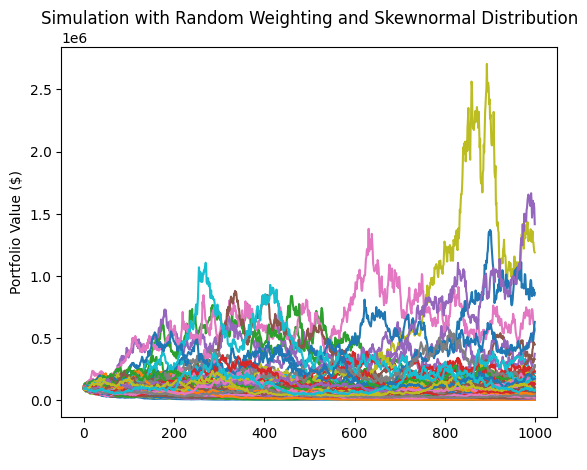

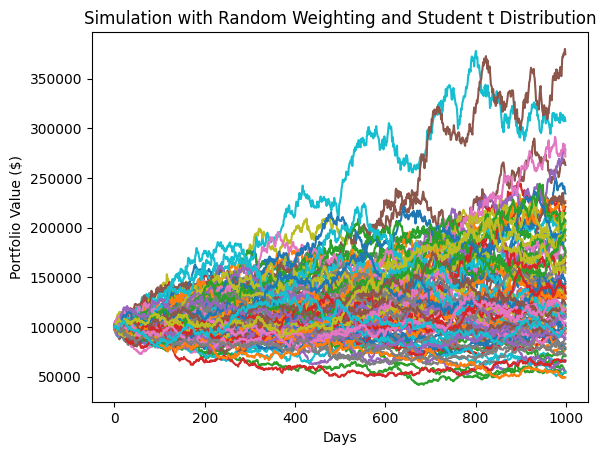

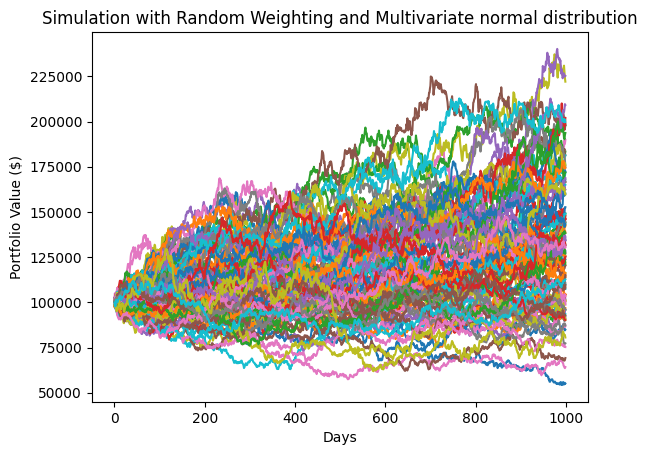

In [8]:
# MODIFICATION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf


  ###############################################
  #   FUNCTION TO LOAD DATA FROM YAHOO FINANCE  #
  ###############################################

def get_stock_data(stocks, start, end):

    stockData = yf.download(stocks, start=start, end=end)
    stockData = stockData['Close']
    
    stock_returns = stockData.pct_change()

    return stock_returns


  ###############################################
  # FUNCTIONS TO CALCULATE DISTRIBUTION METHODS #
  ###############################################

def lognormal_distribution(weights, T):

  mu = -3 # mean parameter
  sigma = 1 # standard deviation parameter
  Z = np.random.lognormal(mean=mu, sigma=sigma, size=(T, len(weights)))
  return Z

def skewnormal_distribution(weights, T):

  alpha = 5 # skewness parameter
  Z = np.random.randn(T, len(weights))
  Z = alpha*Z + np.random.normal(size=(T, len(weights)))
  return Z

def student_t_distribution(weights, T):
  nu = 5 # degrees of freedom parameter
  Z = np.random.standard_t(df=nu, size=(T, len(weights)))
  return Z

def multivariate_normal_distribution(weights, T):
  Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
  return Z
  

  ###############################################
  #       FUNCTIONS TO CALCULATE wEIGHTS        #
  ###############################################

def equal_weighting(mean_returns):
  weights = np.ones(len(mean_returns)) / len(mean_returns)
  return weights

def random_weighting(mean_returns):
  weights = np.random.random(len(mean_returns))
  weights /= np.sum(weights)
  return weights


  ###############################################
  #          MONTE CARLO SIMULATION             #
  ###############################################

# function to perfom monte carlo simulation
def monte_carlo_simulation(stock_returns, num_of_sims, sim_timeframe: int, initial_portifolio, stocks_weights, returns_distribution):

  mean_returns = stock_returns.mean()
  covariance_matrix = stock_returns.cov()

  meanM = np.full(shape=(sim_timeframe, len(stocks_weights(mean_returns))), fill_value=mean_returns)
  meanM = meanM.T
  portfolio_sims = np.full(shape=(sim_timeframe, num_of_sims), fill_value=0.0)

  for m in range(0, num_of_sims):
      L = np.linalg.cholesky(covariance_matrix) #Cholesky decomposition to Lower Triangular Matrix
      dailyReturns = meanM + np.inner(L, returns_distribution(stocks_weights(mean_returns), sim_timeframe)) #Correlated daily returns for individual stocks
      portfolio_sims[:,m] = np.cumprod(np.inner(stocks_weights(mean_returns), dailyReturns.T)+1)*initial_portifolio

  return portfolio_sims


  ###############################################
  #          PLOT SIMULATION RESULTS            #
  ###############################################

# function to plot the simulation results
def plot_simulation_results(portfolio_sims, plot_title):

  plt.plot(portfolio_sims)
  plt.ylabel('Portfolio Value ($)')
  plt.xlabel('Days')
  plt.title(plot_title)
  plt.show()



  ####################################################
  # FUNCTIONS TO PERFOM THE SIMULATION OF PORTIFOLIO #
  ####################################################

def run_portifolio_simulation(num_sims, sim_time, init_portifolio):

  weights = {'Equal Weighting':equal_weighting, 'Random Weighting':random_weighting}
  returns_dist = {"Lognormal Distribution":lognormal_distribution, "Skewnormal Distribution":skewnormal_distribution, "Student t Distribution" : student_t_distribution, "Multivariate normal distribution":multivariate_normal_distribution}

  # weights = [equal_weighting, random_weighting]
  # returns_dist = [lognormal_distribution, skewnormal_distribution, student_t_distribution, multivariate_normal_distribution]

  stocks = [stock + '.AX' for stock in ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']]
  endDate = dt.datetime.now()
  startDate = endDate - dt.timedelta(days=500)
  returns = get_stock_data(stocks, startDate, endDate)
  mean_returns = returns.mean()
  for weight in weights:
    for dist in returns_dist:
      plot_title = f'Simulation with {weight} and {dist}'
      portifolio_sims = monte_carlo_simulation(stock_returns=returns, num_of_sims=num_sims, sim_timeframe=sim_time, initial_portifolio=init_portifolio, stocks_weights=weights[weight], returns_distribution=returns_dist[dist])
      plot_simulation_results(portifolio_sims, plot_title)



# testing the simulation functions
run_portifolio_simulation(100, 1000, 100000)







  



Weighting is a crucial factor in portfolio optimization. The traditional approach of equal weighting, where all assets in a portfolio are allocated an equal weight, may not be optimal in all situations. Equal weighting can be useful in reducing concentration risk, but it may not necessarily lead to the best risk-return profile for the portfolio. On the other hand, random weighting can provide greater diversification and may perform better in certain market conditions. By providing both options, the modified code allows the user to explore the impact of different weighting strategies on portfolio performance.

Similarly, different distributions for the returns of the portfolio can have a significant impact on portfolio optimization. The assumption of multivariate normality for returns is a simplification and may not accurately capture the distribution of returns for all assets in the portfolio. Other distributions, such as lognormal, skewnormal, or Student's t, may be more appropriate for certain assets or market conditions. By providing multiple options for return distributions, the modified code allows the user to choose the distribution that best fits their portfolio and market conditions.

In addition to providing multiple options for weighting and distributions, the modified code also emphasizes the importance of modularization and encapsulation. By separating the downloading of financial data from the calculation of mean returns and covariance matrix, the code becomes more modular and flexible. This allows the user to easily modify or replace different parts of the code as needed. Additionally, by creating standalone functions for specific tasks such as Monte Carlo simulation, the code becomes more readable and easier to understand. This is important in financial modeling, where complex calculations and analysis can quickly become unwieldy without proper organization and encapsulation.

In conclusion, the modifications made to the original code provide more flexibility and modularity in modeling and simulating the portfolio, which is crucial in dealing with complex and volatile financial data. By providing different options for weighting and distributions, and by emphasizing the need for encapsulation and modularity, the modified code is better suited for financial modeling and optimization.

